In [1]:
#!pip install git+https://github.com/GiadaLalli/ISN-tractor
#THIS NOTEBOOK IS NOT PART OF E-ABIN

In [2]:
!python --version

Python 3.10.14


In [3]:
import gc
gc.collect()

689

In [4]:
in_colab = False

In [5]:
if in_colab:

  from google.colab import drive
  drive.mount("/content/drive/", force_remount = True)

In [6]:
if in_colab:
  !pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 #-f https://download.pytorch.org/whl/cu121

In [7]:
if in_colab:
  !pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.3.0+cpu.html#torch-2.3.0+cu121.html

In [8]:
if in_colab:
  !pip install torch_geometric

In [9]:
if in_colab:
  import locale
  def getpreferredencoding(do_setlocale = True):
      return "UTF-8"
  locale.getpreferredencoding = getpreferredencoding
  !pip install pygod

In [10]:
import torch
torch.__version__

'2.4.0+cu121'

In [11]:
if in_colab:
  %cd "/content/drive/MyDrive/Colab Notebooks/GraphOutlierDetection"

In [12]:
import os
cwd = os.getcwd()
sep = os.sep
datapath = cwd + sep + "use_case" + sep + "data" + sep + "temporal" + sep + "GSE30550_series_matrix.txt"
datapath

'C:\\Users\\ugo-c\\Desktop\\ADIN\\use_case\\data\\temporal\\GSE30550_series_matrix.txt'

In [13]:
#%load_ext cudf.pandas
import pandas as pd 

In [14]:
def get_skiprows(filepath):

    with open(filepath, "r") as file:
        lines = file.readlines()
    skiprows = 0
    for idx, line in enumerate(lines):
        #if idx < 40:
        #    print(idx, line.split("\t"))
        if len(line.split("\t")) == 1:
            skiprows = idx
            break
    return skiprows

def read_gene_expression(filepath):
    skiprows = get_skiprows(filepath)
    print("Skiprows: ", skiprows)

    df = pd.read_csv(filepath, index_col = 0, skiprows=skiprows, sep = "\t", on_bad_lines='warn').T
    return skiprows, df 

In [15]:
_, df = read_gene_expression(datapath)
df

Skiprows:  27


C:\Users\ugo-c\AppData\Local\Temp\ipykernel_27748\3583638909.py:18: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,2

!Sample_title,!Sample_geo_accession,!Sample_status,!Sample_submission_date,!Sample_last_update_date,!Sample_type,!Sample_channel_count,!Sample_source_name_ch1,!Sample_organism_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,...,998_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at,999_at,9_at,!series_matrix_table_end
"Subject 01, Baseline",GSM757898,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 01, baseline",Homo sapiens,tissue: peripheral blood,time_hpi: Baseline,...,4.976031,7.534166,6.838035,5.797856,8.207846,6.574342,9.022322,4.103891,5.539212,NaN
"Subject 01, Hour 00",GSM757899,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 01, hour 00",Homo sapiens,tissue: peripheral blood,time_hpi: Hour 00,...,5.063782,7.614569,6.970351,5.685897,8.163903,7.011124,9.092744,4.089991,5.757164,NaN
"Subject 01, Hour 005",GSM757900,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 01, hour 005",Homo sapiens,tissue: peripheral blood,time_hpi: Hour 005,...,5.090365,7.823499,6.93891,5.85744,8.035841,6.546866,8.843981,4.089407,5.278392,NaN
"Subject 01, Hour 012",GSM757901,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 01, hour 012",Homo sapiens,tissue: peripheral blood,time_hpi: Hour 012,...,5.014346,7.626375,7.132733,5.60291,8.112614,6.814328,9.052176,4.118482,5.540299,NaN
"Subject 01, Hour 021",GSM757902,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 01, hour 021",Homo sapiens,tissue: peripheral blood,time_hpi: Hour 021,...,5.192609,7.195822,6.837532,5.699241,7.925944,6.812292,9.570762,4.152134,6.081064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Subject 17, Hour 084",GSM758161,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 17, hour 084",Homo sapiens,tissue: peripheral blood,time_hpi: Hour 084,...,5.399526,6.240056,6.532336,5.572659,7.842962,7.701363,9.094296,4.112049,6.683759,NaN
"Subject 17, Hour 093",GSM758162,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 17, hour 093",Homo sapiens,tissue: peripheral blood,time_hpi: Hour 093,...,5.398154,6.960838,6.935378,5.491031,8.034816,7.830799,9.362147,3.906735,7.352122,NaN
"Subject 17, Hour 101",GSM758163,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 17, hour 101",Homo sapiens,tissue: peripheral blood,time_hpi: Hour 101,...,5.405663,6.891295,6.746261,5.694099,7.833684,7.877236,9.518292,3.964358,7.603242,NaN
"Subject 17, Hour 108",GSM758164,Public on Jul 12 2011,Jul 11 2011,Nov 30 2020,RNA,1,"peripheral blood of subject 17, hour 108",Homo sapiens,tissue: peripheral blood,time_hpi: Hour 108,...,5.391001,6.426128,6.509798,6.0135,7.773788,7.672796,9.044179,4.010692,7.186604,NaN


In [16]:
def map_subject_hour_geoaccession(dataframe):

    map_dict = {}
    for index, row in enumerate(dataframe.iterrows()):
        subject, hour = row[0].split(",")
        if subject not in map_dict.keys():
            map_dict[subject] = [{"Hour": hour, "ID": row[1]["!Sample_geo_accession"]}]
        else:
            map_dict[subject].append({"Hour": hour, "ID": row[1]["!Sample_geo_accession"]})
    return map_dict

In [17]:
map_dict = map_subject_hour_geoaccession(df)
map_dict

{'Subject 01': [{'Hour': ' Baseline', 'ID': 'GSM757898'},
  {'Hour': ' Hour 00', 'ID': 'GSM757899'},
  {'Hour': ' Hour 005', 'ID': 'GSM757900'},
  {'Hour': ' Hour 012', 'ID': 'GSM757901'},
  {'Hour': ' Hour 021', 'ID': 'GSM757902'},
  {'Hour': ' Hour 029', 'ID': 'GSM757903'},
  {'Hour': ' Hour 036', 'ID': 'GSM757904'},
  {'Hour': ' Hour 045', 'ID': 'GSM757905'},
  {'Hour': ' Hour 053', 'ID': 'GSM757906'},
  {'Hour': ' Hour 060', 'ID': 'GSM757907'},
  {'Hour': ' Hour 069', 'ID': 'GSM757908'},
  {'Hour': ' Hour 077', 'ID': 'GSM757909'},
  {'Hour': ' Hour 084', 'ID': 'GSM757910'},
  {'Hour': ' Hour 093', 'ID': 'GSM757911'},
  {'Hour': ' Hour 101', 'ID': 'GSM757912'},
  {'Hour': ' Hour 108', 'ID': 'GSM757913'}],
 'Subject 02': [{'Hour': ' Baseline', 'ID': 'GSM757914'},
  {'Hour': ' Hour 00', 'ID': 'GSM757915'},
  {'Hour': ' Hour 005', 'ID': 'GSM757916'},
  {'Hour': ' Hour 012', 'ID': 'GSM757917'},
  {'Hour': ' Hour 021', 'ID': 'GSM757918'},
  {'Hour': ' Hour 029', 'ID': 'GSM757919'},
  {'H

In [18]:
import numpy as np 

def find_values_id(dataframe):

    columns = dataframe.columns
    for idx, column in enumerate(columns):
        if column == "ID_REF":
            values_id = idx+1
            break
    return values_id

def get_targets(dataframe):
    
    map_ys = {}
    ys = []
    patients = []
    
    for index, row in enumerate(dataframe.iterrows()):
        #print(row[0], row[1])
        patient = row[1]["!Sample_geo_accession"]#["ID_REF"]
        label = row[0]
        if "healthy" in label.lower():
            y = "control"
        elif "control" in label.lower():
            y = "control"
        elif "normal" in label.lower():
            y = "control"
        else: 
            y = "cancer"
        ys.append(y)
        patients.append(patient)
        map_ys[patient] = y
        
    ys = [0 if y == "control" else 1 for y in ys]
    clinic = pd.DataFrame(data = np.array(ys), index = patients, columns = ["Target"])
    clinic.index.name = "sample"
    return clinic
    
def get_expressions(dataframe):
    
    values_id = find_values_id(dataframe)
    print("Values id: ", values_id)
    values_columns = dataframe.columns[values_id:-1]
    values = np.array(dataframe[values_columns].values)
    
    clinic = get_targets(dataframe)
    patients = list(clinic.index)
    
    patient_values = {}
    for i, patient in enumerate(patients):
        patient_values[patient] = values[i, :]
    
    values_df = pd.DataFrame(values, index = patients, columns = values_columns)
    return values_df

In [19]:
expr = get_expressions(df)
expr

Values id:  37


!Sample_title,10000_at,10001_at,10002_at,10003_at,10004_at,10005_at,10006_at,10007_at,10009_at,1000_at,...,9989_at,998_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at,999_at,9_at
GSM757898,4.527715063,8.118238455,4.629273825,3.733003614,6.140368262,8.154327511,9.330611814,8.464821803,3.623189314,4.879573898,...,10.375686,4.976031,7.534166,6.838035,5.797856,8.207846,6.574342,9.022322,4.103891,5.539212
GSM757899,4.600442,8.303778539,4.53295112,3.663344414,6.369838741,8.235681283,9.383703225,8.074555362,3.561420977,4.673310643,...,10.506466,5.063782,7.614569,6.970351,5.685897,8.163903,7.011124,9.092744,4.089991,5.757164
GSM757900,4.436855009,8.077196731,4.794183451,3.824897905,6.418774773,8.272591034,9.124286976,8.16512,3.637153473,4.83574534,...,10.587121,5.090365,7.823499,6.93891,5.85744,8.035841,6.546866,8.843981,4.089407,5.278392
GSM757901,4.338744369,8.459464474,4.558316332,3.758481538,6.4296851,8.242253744,9.41086871,8.36438419,3.853627989,4.625260215,...,10.635151,5.014346,7.626375,7.132733,5.60291,8.112614,6.814328,9.052176,4.118482,5.540299
GSM757902,4.494652756,8.407301156,4.640785179,3.606014529,6.728542414,8.518035724,9.432817204,8.420913721,3.58524923,4.687651067,...,10.471442,5.192609,7.195822,6.837532,5.699241,7.925944,6.812292,9.570762,4.152134,6.081064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM758161,4.630843031,8.175377292,4.423729063,3.906791791,6.541103893,8.521386805,9.630246671,8.164957542,3.53355123,4.624536674,...,9.798787,5.399526,6.240056,6.532336,5.572659,7.842962,7.701363,9.094296,4.112049,6.683759
GSM758162,4.403335233,8.306804699,4.32451934,3.631412861,6.42071965,8.430061422,10.13960417,8.130712076,3.477412236,4.606663863,...,10.769965,5.398154,6.960838,6.935378,5.491031,8.034816,7.830799,9.362147,3.906735,7.352122
GSM758163,4.275330004,8.261346285,4.297250253,3.772704457,6.247837116,8.55970811,9.978871362,8.139657424,3.435078562,4.507761399,...,10.836654,5.405663,6.891295,6.746261,5.694099,7.833684,7.877236,9.518292,3.964358,7.603242
GSM758164,4.572091506,7.844451095,4.443849142,3.644596784,6.282365716,8.483152417,9.756770519,8.209373946,3.557489775,4.662462592,...,9.669108,5.391001,6.426128,6.509798,6.0135,7.773788,7.672796,9.044179,4.010692,7.186604


In [20]:
import GEOparse

def find_geoaccession_code(filepath, skiprows):
    
    with open(filepath, "r") as file:
        lines = file.readlines()
    
    for i, line in enumerate(lines):  # Enumerate to count the lines
        if i >= skiprows:  # Stop after reading X lines
            break
        if "!Series_geo_accession" in line:
            geo_accession = line.split("\t")[1].strip().replace('"', "")
    return geo_accession

def get_platforms(geo_accession):
    gse = GEOparse.get_GEO(geo=geo_accession, destdir="./")
    # Get the platform IDs associated with this series
    platforms = gse.gpls.keys()
    return gse, platforms

def get_annotation_df(gse, values_df, platforms):
    
    found_platform = None
    annotation_df = None

    for platform in platforms:

        print(platform)
        # Get the platform object
        gpl = gse.gpls[platform]
      
        # Convert the platform object into a DataFrame
        platform_df = gpl.table
        columns_values = values_df.columns.to_list()
        columns = platform_df["ID"].to_list()
        
        #print(columns[-10:], columns_values[-10:])
        for column in columns_values:
            if column in columns:
                found_platform = platform
                annotation_df = platform_df
                break 

    return found_platform, annotation_df


In [21]:
skiprows = get_skiprows(datapath)
geo_code = find_geoaccession_code(datapath, skiprows)
geo_code

'GSE30550'

In [22]:
subjects = list(map_dict.keys())
subject_id = subjects[0]
subject = map_dict[subject_id]
subject_id, subject

('Subject 01',
 [{'Hour': ' Baseline', 'ID': 'GSM757898'},
  {'Hour': ' Hour 00', 'ID': 'GSM757899'},
  {'Hour': ' Hour 005', 'ID': 'GSM757900'},
  {'Hour': ' Hour 012', 'ID': 'GSM757901'},
  {'Hour': ' Hour 021', 'ID': 'GSM757902'},
  {'Hour': ' Hour 029', 'ID': 'GSM757903'},
  {'Hour': ' Hour 036', 'ID': 'GSM757904'},
  {'Hour': ' Hour 045', 'ID': 'GSM757905'},
  {'Hour': ' Hour 053', 'ID': 'GSM757906'},
  {'Hour': ' Hour 060', 'ID': 'GSM757907'},
  {'Hour': ' Hour 069', 'ID': 'GSM757908'},
  {'Hour': ' Hour 077', 'ID': 'GSM757909'},
  {'Hour': ' Hour 084', 'ID': 'GSM757910'},
  {'Hour': ' Hour 093', 'ID': 'GSM757911'},
  {'Hour': ' Hour 101', 'ID': 'GSM757912'},
  {'Hour': ' Hour 108', 'ID': 'GSM757913'}])

In [23]:
for elem in subject:
    hour = elem["Hour"]
    id = elem["ID"]
    print(hour, "/", id)

 Baseline / GSM757898
 Hour 00 / GSM757899
 Hour 005 / GSM757900
 Hour 012 / GSM757901
 Hour 021 / GSM757902
 Hour 029 / GSM757903
 Hour 036 / GSM757904
 Hour 045 / GSM757905
 Hour 053 / GSM757906
 Hour 060 / GSM757907
 Hour 069 / GSM757908
 Hour 077 / GSM757909
 Hour 084 / GSM757910
 Hour 093 / GSM757911
 Hour 101 / GSM757912
 Hour 108 / GSM757913


In [25]:
def get_arrays_from_subject(dataframe, expr, subject_id):

    hours = []
    columns = expr.columns 
    temp = []
    
    for index, row in enumerate(dataframe.iterrows()):

        subject_id_curr, hour = row[0].split(",")
        if subject_id == subject_id_curr:
            expr_subj = expr.values[index, :]
            #print(expr_subj.shape)
            temp.append(expr_subj)
            hours.append(hour)
            
    temp = np.stack(temp)
    expr_subject = pd.DataFrame(temp, columns = columns)
    expr_subject.index = hours 
    
    return expr_subject, hours 

In [26]:
expr_subject, hours = get_arrays_from_subject(df, expr, subject_id)
expr_subject 

!Sample_title,10000_at,10001_at,10002_at,10003_at,10004_at,10005_at,10006_at,10007_at,10009_at,1000_at,...,9989_at,998_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at,999_at,9_at
Baseline,4.527715063,8.118238455,4.629273825,3.733003614,6.140368262,8.154327511,9.330611814,8.464821803,3.623189314,4.879573898,...,10.375686,4.976031,7.534166,6.838035,5.797856,8.207846,6.574342,9.022322,4.103891,5.539212
Hour 00,4.600442,8.303778539,4.53295112,3.663344414,6.369838741,8.235681283,9.383703225,8.074555362,3.561420977,4.673310643,...,10.506466,5.063782,7.614569,6.970351,5.685897,8.163903,7.011124,9.092744,4.089991,5.757164
Hour 005,4.436855009,8.077196731,4.794183451,3.824897905,6.418774773,8.272591034,9.124286976,8.16512,3.637153473,4.83574534,...,10.587121,5.090365,7.823499,6.93891,5.85744,8.035841,6.546866,8.843981,4.089407,5.278392
Hour 012,4.338744369,8.459464474,4.558316332,3.758481538,6.4296851,8.242253744,9.41086871,8.36438419,3.853627989,4.625260215,...,10.635151,5.014346,7.626375,7.132733,5.60291,8.112614,6.814328,9.052176,4.118482,5.540299
Hour 021,4.494652756,8.407301156,4.640785179,3.606014529,6.728542414,8.518035724,9.432817204,8.420913721,3.58524923,4.687651067,...,10.471442,5.192609,7.195822,6.837532,5.699241,7.925944,6.812292,9.570762,4.152134,6.081064
Hour 029,4.332082204,7.785612038,4.430558614,3.974601492,5.443803609,7.970551711,8.687588269,8.405667452,3.715153688,5.486241225,...,10.375767,4.790584,7.071439,6.27195,5.671891,7.650429,6.767792,9.609473,4.747963,5.768666
Hour 036,4.637091753,7.96950338,4.844467057,3.635671113,5.691579704,8.087414966,9.442049356,7.998737452,3.817817188,4.778339715,...,10.707577,5.025121,8.259923,7.47182,5.750987,8.175068,5.878276,10.636705,4.160842,5.819108
Hour 045,4.376774625,8.402032516,4.776047431,3.937843217,5.929230678,8.35711119,9.830711073,8.341638131,3.685375176,4.657699162,...,10.747034,5.026684,7.86571,7.389022,5.860824,8.361536,6.032656,10.916983,4.175783,5.936889
Hour 053,4.214539839,8.352591098,4.628149883,3.737039522,6.24699143,8.402984286,9.667916873,8.577269847,3.383799916,4.440056842,...,10.65977,5.158991,7.486374,7.169956,5.755891,7.996086,6.57663,10.920818,4.023667,6.22928
Hour 060,4.220953667,7.852994451,4.513478645,3.728672767,6.294776159,8.133831904,9.399445255,8.731014169,3.642498991,4.5715296,...,10.346204,5.359119,7.198378,6.512691,6.075897,7.9367,6.890271,11.040938,4.058063,6.017414


In [52]:
from isn_tractor import ibisn as it

def create_interaction_df(values, genes, th=0.4):
    
    values = torch.from_numpy(values).to(device)

    corr = torch.corrcoef(values)

    df = pd.DataFrame([], columns = ["feature_1", "feature_2"])
    idx = 0
    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if i != j:
                c = corr[i, j]
                if abs(c) >= th:
                    gene1 = genes[i]
                    gene2 = genes[j]
                    df.loc[idx] = [gene1, gene2]
                    idx += 1 
    return df
    
def create_sparse_isns(expr): 

    genes = expr.columns
    values = expr.values
    interaction_df = create_interaction_df(values, genes)
    isn_generator = it.sparse_isn(expr, None, interaction_df, "pearson", "average", device)
    
    isns = []
    for i, isn in enumerate(isn_generator):
        if i%100 == 0:
            print(i, isn.shape)
        isns.append(isn)
        del isn
        gc.collect()
        torch.cuda.empty_cache()

    return isns, interaction_df

In [35]:
expr_subject

!Sample_title,10000_at,10001_at,10002_at,10003_at,10004_at,10005_at,10006_at,10007_at,10009_at,1000_at,...,9989_at,998_at,9990_at,9991_at,9992_at,9993_at,9994_at,9997_at,999_at,9_at
Baseline,4.527715,8.118238,4.629274,3.733004,6.140368,8.154328,9.330612,8.464822,3.623189,4.879574,...,10.375686,4.976031,7.534166,6.838035,5.797856,8.207846,6.574342,9.022322,4.103891,5.539212
Hour 00,4.600442,8.303779,4.532951,3.663344,6.369839,8.235681,9.383703,8.074555,3.561421,4.673311,...,10.506466,5.063782,7.614569,6.970351,5.685897,8.163903,7.011124,9.092744,4.089991,5.757164
Hour 005,4.436855,8.077197,4.794183,3.824898,6.418775,8.272591,9.124287,8.165120,3.637153,4.835745,...,10.587121,5.090365,7.823499,6.938910,5.857440,8.035841,6.546866,8.843981,4.089407,5.278392
Hour 012,4.338744,8.459464,4.558316,3.758482,6.429685,8.242254,9.410869,8.364384,3.853628,4.625260,...,10.635151,5.014346,7.626375,7.132733,5.602910,8.112614,6.814328,9.052176,4.118482,5.540299
Hour 021,4.494653,8.407301,4.640785,3.606015,6.728542,8.518036,9.432817,8.420914,3.585249,4.687651,...,10.471442,5.192609,7.195822,6.837532,5.699241,7.925944,6.812292,9.570762,4.152134,6.081064
Hour 029,4.332082,7.785612,4.430559,3.974601,5.443804,7.970552,8.687588,8.405667,3.715154,5.486241,...,10.375767,4.790584,7.071439,6.271950,5.671891,7.650429,6.767792,9.609473,4.747963,5.768666
Hour 036,4.637092,7.969503,4.844467,3.635671,5.691580,8.087415,9.442049,7.998737,3.817817,4.778340,...,10.707577,5.025121,8.259923,7.471820,5.750987,8.175068,5.878276,10.636705,4.160842,5.819108
Hour 045,4.376775,8.402033,4.776047,3.937843,5.929231,8.357111,9.830711,8.341638,3.685375,4.657699,...,10.747034,5.026684,7.865710,7.389022,5.860824,8.361536,6.032656,10.916983,4.175783,5.936889
Hour 053,4.214540,8.352591,4.628150,3.737040,6.246991,8.402984,9.667917,8.577270,3.383800,4.440057,...,10.659770,5.158991,7.486374,7.169956,5.755891,7.996086,6.576630,10.920818,4.023667,6.229280
Hour 060,4.220954,7.852994,4.513479,3.728673,6.294776,8.133832,9.399445,8.731014,3.642499,4.571530,...,10.346204,5.359119,7.198378,6.512691,6.075897,7.936700,6.890271,11.040938,4.058063,6.017414


In [29]:
expr_subject.isna().sum().sum()

0

In [30]:
for column in expr_subject.columns:
    expr_subject[column] = pd.to_numeric(expr_subject[column], errors ='coerce')

In [31]:
expr_subject.values

array([[ 4.52771506,  8.11823846,  4.62927383, ...,  9.02232191,
         4.10389089,  5.5392116 ],
       [ 4.600442  ,  8.30377854,  4.53295112, ...,  9.09274355,
         4.08999138,  5.75716434],
       [ 4.43685501,  8.07719673,  4.79418345, ...,  8.84398053,
         4.08940705,  5.27839209],
       ...,
       [ 4.53868598,  8.54303709,  4.47881693, ..., 10.2548951 ,
         4.10051788,  5.61618548],
       [ 4.24580629,  8.49234423,  4.61273148, ..., 10.5601349 ,
         3.91139898,  6.33340752],
       [ 4.2857532 ,  8.30316791,  4.53947309, ..., 10.28836464,
         4.07402297,  6.12910169]])

In [32]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [54]:
isns, interaction_df = create_sparse_isns(expr_subject)
isns

0 torch.Size([16])
100 torch.Size([16])
200 torch.Size([16])


[tensor([-0.3386,  0.3730, -0.1762, -0.7923,  0.1496,  1.4638, -1.1183, -0.4931,
         -0.9201,  2.4717, -0.3277,  0.1618, -3.1076,  0.9556, -1.5236, -0.5412],
        device='cuda:0', dtype=torch.float64),
 tensor([ 0.3085, -0.8376, -0.1718,  0.6164,  0.3634,  1.0635,  2.1487, -0.6535,
         -0.1145,  1.3537,  0.5664,  0.7275,  0.0611, -0.8915,  0.1906,  0.8745],
        device='cuda:0', dtype=torch.float64),
 tensor([-0.5887, -1.0465, -0.4605, -0.2500, -0.3516, -0.9021, -1.3832, -0.5544,
          0.7176,  0.7958,  0.0757,  0.5214, -1.9653, -0.2678, -1.2539, -0.9406],
        device='cuda:0', dtype=torch.float64),
 tensor([-0.3028,  0.2855, -0.1418, -0.4387,  0.5099,  2.8757, -2.2888,  0.4084,
          0.1016, -0.1342,  0.2110, -0.8891,  0.1683,  0.3289, -1.3667, -1.0751],
        device='cuda:0', dtype=torch.float64),
 tensor([-0.5479, -0.4855, -0.1426,  0.1505,  0.3545,  1.8101, -1.5846, -0.2525,
         -0.7795,  1.6658,  0.0801,  1.0052, -1.6685,  0.9830, -1.3855, -1.6683

In [103]:
def compute_embeddings(G):

    # Apply Node2Vec
    node2vec = Node2Vec(G, dimensions=2, walk_length=30, num_walks=200, workers=4)
    model = node2vec.fit()
    
    # Get the node embeddings (a matrix where rows correspond to genes, columns to embedding dimensions)
    return model.wv.vectors

In [43]:
#!pip install node2vec

In [56]:
isns = torch.stack(isns)
isns = isns.T
isns.shape

torch.Size([16, 240])

In [57]:
interaction_df

,feature_1,feature_2
0,10000_at,10001_at
1,10000_at,10002_at
2,10000_at,10003_at
3,10000_at,10004_at
4,10000_at,10005_at
...,...,...
235,10017_at,10010_at
236,10017_at,10013_at
237,10017_at,10014_at
238,10017_at,10015_at


In [59]:
edgelist = [(row["feature_1"], row["feature_2"]) for i, row in interaction_df.iterrows()] 
edgelist

[('10000_at', '10001_at'),
 ('10000_at', '10002_at'),
 ('10000_at', '10003_at'),
 ('10000_at', '10004_at'),
 ('10000_at', '10005_at'),
 ('10000_at', '10006_at'),
 ('10000_at', '10007_at'),
 ('10000_at', '10009_at'),
 ('10000_at', '1000_at'),
 ('10000_at', '10010_at'),
 ('10000_at', '10013_at'),
 ('10000_at', '10014_at'),
 ('10000_at', '10015_at'),
 ('10000_at', '10016_at'),
 ('10000_at', '10017_at'),
 ('10001_at', '10000_at'),
 ('10001_at', '10002_at'),
 ('10001_at', '10003_at'),
 ('10001_at', '10004_at'),
 ('10001_at', '10005_at'),
 ('10001_at', '10006_at'),
 ('10001_at', '10007_at'),
 ('10001_at', '10009_at'),
 ('10001_at', '1000_at'),
 ('10001_at', '10010_at'),
 ('10001_at', '10013_at'),
 ('10001_at', '10014_at'),
 ('10001_at', '10015_at'),
 ('10001_at', '10016_at'),
 ('10001_at', '10017_at'),
 ('10002_at', '10000_at'),
 ('10002_at', '10001_at'),
 ('10002_at', '10003_at'),
 ('10002_at', '10004_at'),
 ('10002_at', '10005_at'),
 ('10002_at', '10006_at'),
 ('10002_at', '10007_at'),
 ('

In [61]:
from node2vec import Node2Vec
import networkx as nx 

temporal_embeddings = {}
for i, isn in enumerate(isns):

    print(i, "/", len(isns), end = "\r")
    t = hours[i]
    G = nx.from_edgelist(edgelist)
    embeddings = compute_embeddings(G)
    temporal_embeddings[t] = embeddings

temporal_embeddings

Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 630.70it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 778.13it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 655.53it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 591.29it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 721.79it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 548.36it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 714.75it/s]


Computing transition probabilities: 100%|████████████████████████████████████████████| 16/16 [00:00<00:00, 1045.49it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 736.43it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 780.16it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 734.49it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 522.95it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 707.36it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 630.46it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 574.02it/s]


Computing transition probabilities: 100%|█████████████████████████████████████████████| 16/16 [00:00<00:00, 743.29it/s]


{' Baseline': array([[-0.04214457, -0.06172039,  0.25096178, ..., -0.1746496 ,
         -0.03084402,  0.01062994],
        [-0.04671302, -0.06845642,  0.23661676, ..., -0.16496097,
         -0.03849941,  0.03974538],
        [-0.05139998, -0.07875903,  0.25409058, ..., -0.18285738,
         -0.03362392,  0.00094327],
        ...,
        [-0.07252752, -0.07312389,  0.23688653, ..., -0.19774415,
         -0.02312536,  0.02637225],
        [-0.05596661, -0.06972196,  0.22769473, ..., -0.21449135,
         -0.03757576,  0.02448127],
        [-0.04524947, -0.07853845,  0.24329218, ..., -0.20151618,
         -0.03005865,  0.02847846]], dtype=float32),
 ' Hour 00': array([[-0.01716556, -0.03496538,  0.27767575, ..., -0.17420985,
         -0.0315343 ,  0.05155873],
        [-0.02916708, -0.03936392,  0.24246943, ..., -0.13934511,
          0.00754101,  0.07430577],
        [-0.02735574, -0.06035236,  0.26649106, ..., -0.1358501 ,
         -0.03908178,  0.10735983],
        ...,
        [-0.01

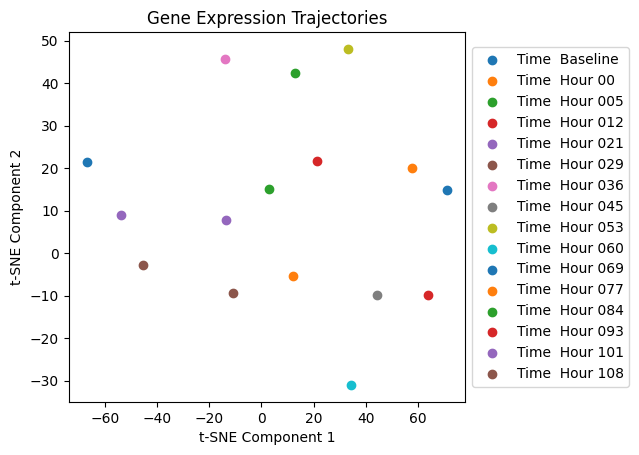

In [96]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' contains the node embeddings for all timepoints
tsne = TSNE(n_components=2, perplexity = 5)
embedding_2d = tsne.fit_transform(embeddings)


for i in range(embedding_2d.shape[0]):
    # Plotting the trajectory in 2D
    plt.scatter(embedding_2d[i, 0], embedding_2d[i, 1], label = "Time {}".format(hours[i]))
            
ax = plt.subplot(111)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Gene Expression Trajectories')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

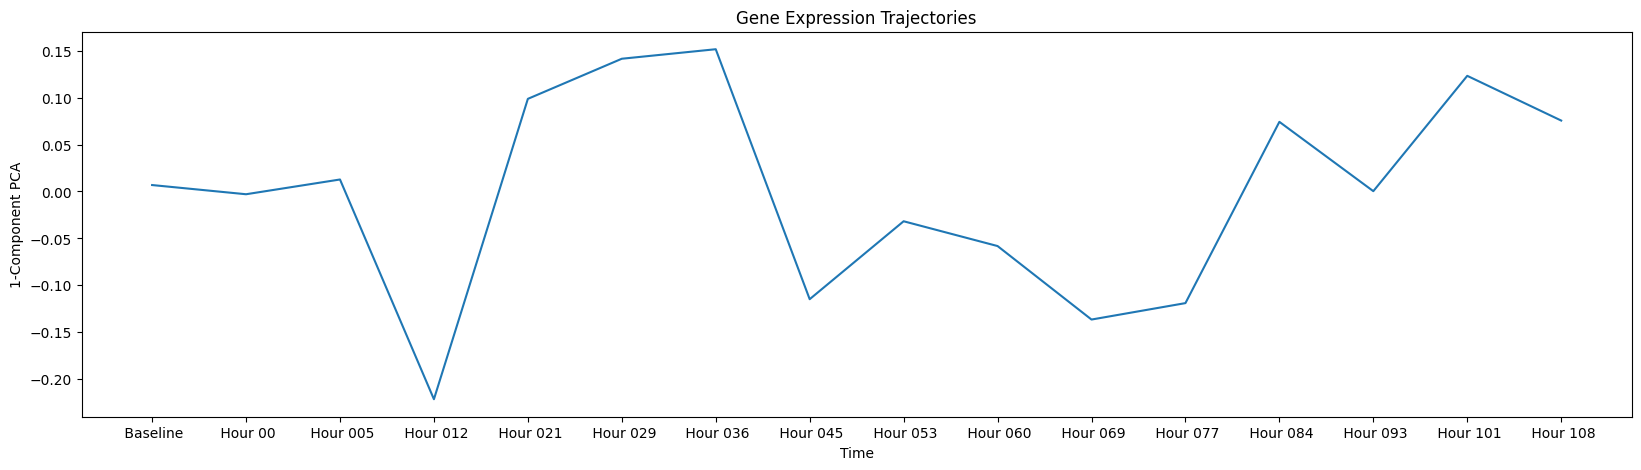

In [102]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 5))

# Reduce dimensionality using PCA or t-SNE
pca = PCA(n_components=1)
reduced_embeddings = pca.fit_transform(embeddings)
plt.plot(hours, reduced_embeddings)
plt.xlabel('Time')
plt.ylabel('1-Component PCA')
plt.title('Gene Expression Trajectories')
plt.show()